## BT4211 Group 9 Hotel Project 

### Clean the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HotelCustomersDataset_Cleaned.csv')
df.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,...,0,0,0,0,0,1,0,0,0,0
1,2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,...,0,0,1,0,0,0,0,0,0,1
3,4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,...,0,0,1,0,0,0,0,0,1,0


In [3]:
df.shape

(75397, 49)

In [4]:
df.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
count,75397.000000,75397.000000,75397.00000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,...,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000
mean,41458.629853,41459.629853,47.43962,457.372482,69.406104,311.787922,70.174372,0.001950,0.000610,0.826638,...,0.136146,0.006525,0.826863,0.002958,0.005093,0.025147,0.131491,0.116583,0.573869,0.144860
std,23946.219003,23946.219003,14.63154,310.607758,88.717833,365.144705,112.928400,0.067813,0.029129,0.688431,...,0.342946,0.080517,0.378368,0.054304,0.071184,0.156572,0.337938,0.320925,0.494517,0.351962
min,0.000000,1.000000,18.00000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20943.000000,20944.000000,36.00000,184.000000,1.000000,91.200000,7.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40780.000000,40781.000000,48.00000,414.000000,34.000000,246.900000,42.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61799.000000,61800.000000,58.00000,722.000000,108.000000,415.000000,91.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,83588.000000,83589.000000,122.00000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Create RFM_df
RFM_df = df.assign(
    Recency=df['DaysSinceLastStay'], 
    Frequency=df['BookingsCheckedIn'], 
    Monetary=df['LodgingRevenue'] + df['OtherRevenue'])
RFM_df = RFM_df[['ID','Recency', 'Frequency', 'Monetary']]
RFM_df.head()

,ID,Recency,Frequency,Monetary
0,1,151,3,476.3
1,3,-1,0,0.0
2,4,1100,1,300.0
3,5,-1,0,0.0
4,6,1097,1,254.0


#### Investigate customers with `Monetary` = 0

In [6]:
# confirm whether customers with Monetary = 0 means they had never stayed at the hotel before
RFM_df[RFM_df['Monetary']==0]['Frequency'].value_counts()

0    15611
1      177
2        9
4        2
7        2
3        2
Name: Frequency, dtype: int64

In [7]:
RFM_df[RFM_df['Recency']==-1].shape

(15611, 4)

In [8]:
df['TotalRevenue'] = df['LodgingRevenue'] + df['OtherRevenue']
df[(df['TotalRevenue']==0) & (df['DaysSinceFirstStay']!=-1)][['MarketSegment_Complementary','MarketSegment_Groups','MarketSegment_Direct','MarketSegment_Travel Agent/Operator']].sum()

MarketSegment_Complementary            166
MarketSegment_Groups                    12
MarketSegment_Direct                     8
MarketSegment_Travel Agent/Operator      6
dtype: int64

- Confirmed that majority, but not all customers with `Monetary` = 0 means they never stayed at the hotel before.
- 15,611 customers were found to have `Monetary` = 0 as they never stayed at the hotel before since their `Recency` = -1 and `Frequency` = 0.
- Remaining 192 customers with `Monetary` = 0 have stayed at the hotel at least once. 
- Majority of these 192 customers belong to the 'Complementary' MarketSegment, which probably explains why they did not pay for the hotel stay. Other segments include 'Groups', 'Direct', and 'Travel Agent/Operator'.
- Since they are only 192 such customers (vvv small proportion), can just drop them and focus on higher valued customers.

In [9]:
# Only keep clients that had make a check-in in the past and is considered a client
print(f'There were {len(RFM_df)} customers at first.\n')

RFM_df = RFM_df[
    (RFM_df['Recency'] > 0) & 
    (RFM_df['Frequency'] != 0)  
   & (RFM_df['Monetary'] != 0)
    ]

print(f'After dropping customers who have not stayed at the hotel and/or have no monetary value, there are {len(RFM_df)} customers.\n')

print(RFM_df.head())

There were 75397 customers at first.

After dropping customers who have not stayed at the hotel and/or have no monetary value, there are 59593 customers.

   ID  Recency  Frequency  Monetary
0   1      151          3     476.3
2   4     1100          1     300.0
4   6     1097          1     254.0
6   8     1100          1     629.0
8  10     1098          1     243.0


In [10]:
RFM_df.describe()

,ID,Recency,Frequency,Monetary
count,59593.000000,59593.000000,59593.000000,59593.000000
mean,36561.772440,519.054939,1.042085,483.253420
std,22841.005167,301.082006,0.610004,436.730538
min,1.000000,1.000000,1.000000,1.000000
25%,17735.000000,248.000000,1.000000,242.000000
50%,33472.000000,520.000000,1.000000,381.300000
75%,53873.000000,788.000000,1.000000,579.500000
max,83589.000000,1104.000000,66.000000,11930.660000


### Check distribution of data

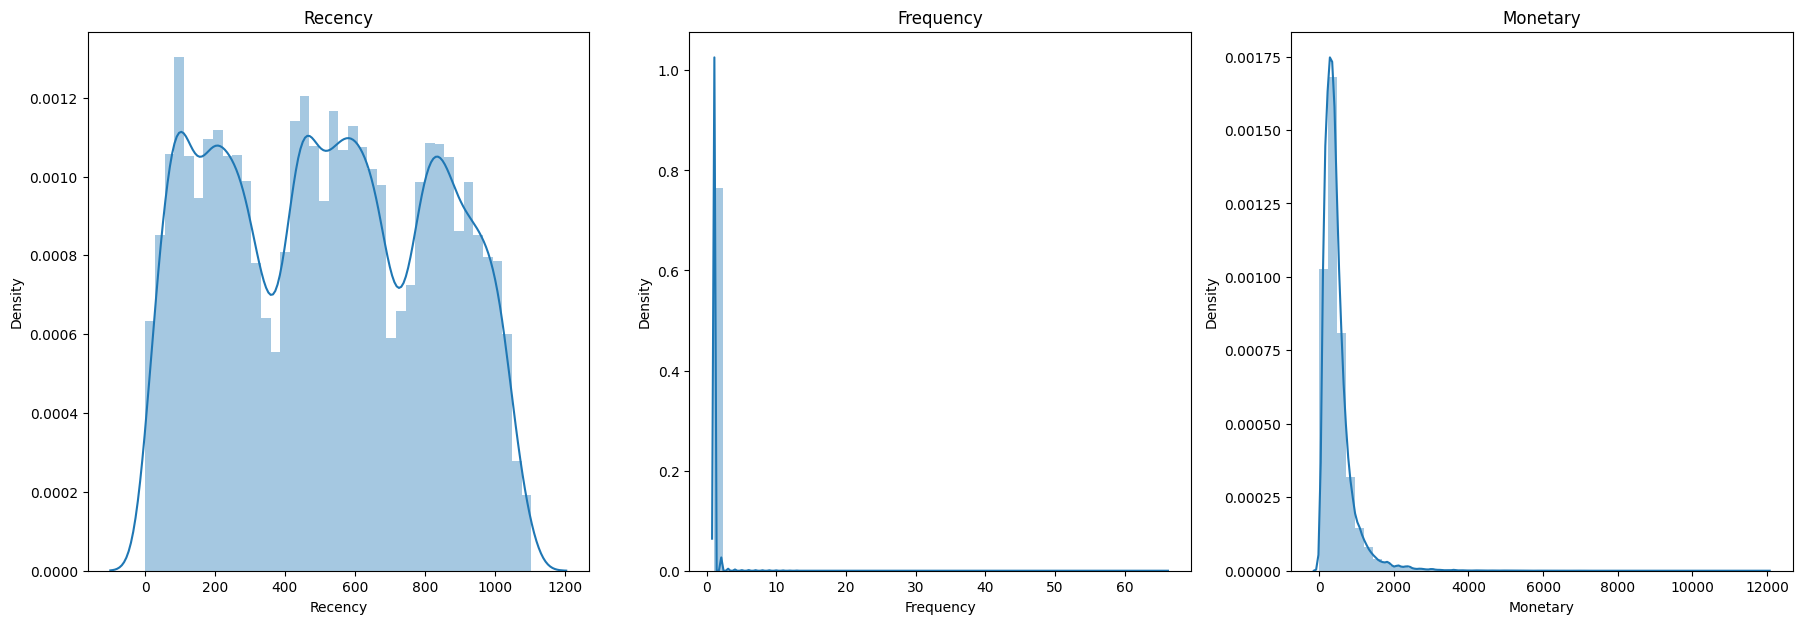

In [11]:
columns=["Recency","Frequency","Monetary"]
plt.figure(figsize=(22,7))
for i,j in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.distplot(RFM_df[j])
    plt.title('{}'.format(j))

#### Further investigate `Frequency` distribution

In [12]:
freq_dist=RFM_df.groupby('Frequency').size().rename("Percentage").transform(lambda x: x/RFM_df['Frequency'].sum())
freq_dist.to_frame()

,Percentage
Frequency,
1,0.938230
2,0.016924
3,0.001852
4,0.000870
5,0.000322
6,0.000290
7,0.000209
8,0.000161
9,0.000145


- `Frequency` value distribution is extremely skewed due to majority of customers being non-repeat customers, i.e. nearly 94% of them only stayed at the hotel once

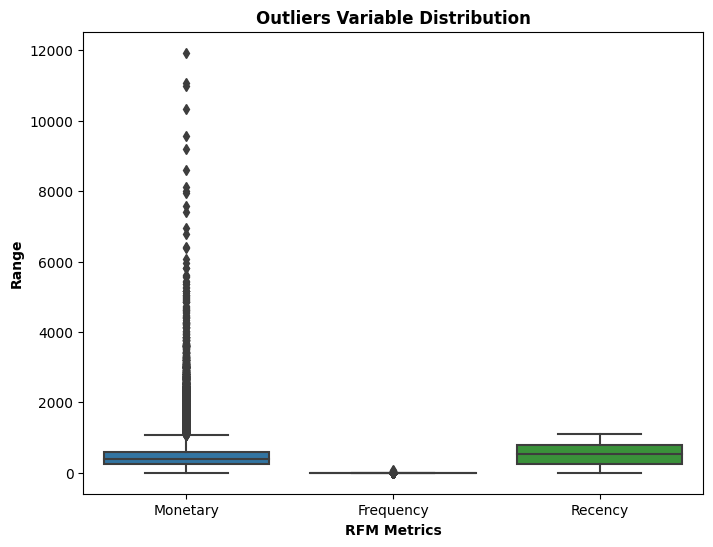

In [13]:
# Outlier Analysis
rfm_metrics = ['Monetary','Frequency','Recency']
plt.figure(figsize=(8,6))
sns.boxplot(data = RFM_df[rfm_metrics], orient="v")
plt.title("Outliers Variable Distribution", fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("RFM Metrics", fontweight = 'bold')
plt.show()

- `Monetary` value distribution is very skewed due to the presence of outliers with high monetary value.
- Extreme outliers are around those over 6,000 dollars, so drop these outliers.

#### Drop `Monetary` outliers

In [14]:
# Identify and remove outliers from the Monetary column
total_outliers = len(RFM_df[RFM_df['Monetary'] > 6000])
RFM_df = RFM_df[RFM_df['Monetary'] <= 6000]
print(f'After dropping {total_outliers} outliers, there are now {len(RFM_df)} customers.')

After dropping 17 outliers, there are now 59576 customers.


## Customer Segmentation 

- As the vast majority are non-repeat customers, the dataset will be split into two subsets - one with customers having `Frequency` value of 1, while the other having `Frequency` value over 1.

### Split dataset into the 2 subsets based on `Frequency` value

In [15]:
# create subset of customers with Frequency of 1
RFM_non_repeat_cust_df = RFM_df[RFM_df['Frequency']==1]

In [15]:
RFM_non_repeat_cust_df.shape, RFM_df.shape

((58259, 4), (1317, 4))

### Do segmentation for customers with `Frequency` of 1 using k-means clustering

In [17]:
RFM_non_repeat_cust_df['Recency'].describe()

count    58259.000000
mean       522.860468
std        300.659721
min          1.000000
25%        254.000000
50%        525.000000
75%        791.000000
max       1104.000000
Name: Recency, dtype: float64

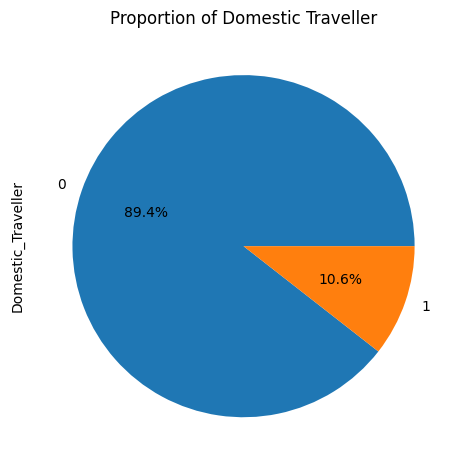

In [18]:
df[df['BookingsCheckedIn']==1]['Domestic_Traveller'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Proportion of Domestic Traveller')
plt.tight_layout()
plt.show()

- The `Recency` value for most of the customers who have only stayed at the hotel once is between 2-3 years, which is reasonable for a hotel business, especially when nearly 90% of customers are non-domestic travellers.
- This implies that `Recency` value is not that important of a metric to measure the value of a customer, but rather it is the `Monetary` value that is most important as they are likely to only stay at the hotel once within the span of 2-3 years. 
- Hence, the hotel should focus on maximising the customer's spending for every hotel stay. 
- As such, the segmentation will be done purely based on the customers' `Monetary` value.

In [19]:
kmeans_df = RFM_non_repeat_cust_df['Monetary']

### Standardise the data

In [20]:
scaler = StandardScaler()
scaled_kmeans_df = scaler.fit_transform(kmeans_df.values.reshape(-1,1))

scaled_df=pd.DataFrame(scaled_kmeans_df,columns=['scaled_monetary'])
scaled_df.sample(5)

,scaled_monetary
33772,-0.118675
55935,-0.202271
32186,-0.744379
9027,-0.307400
32095,0.234708


### Use Elbow Method to find the optimal number of clusters (K)

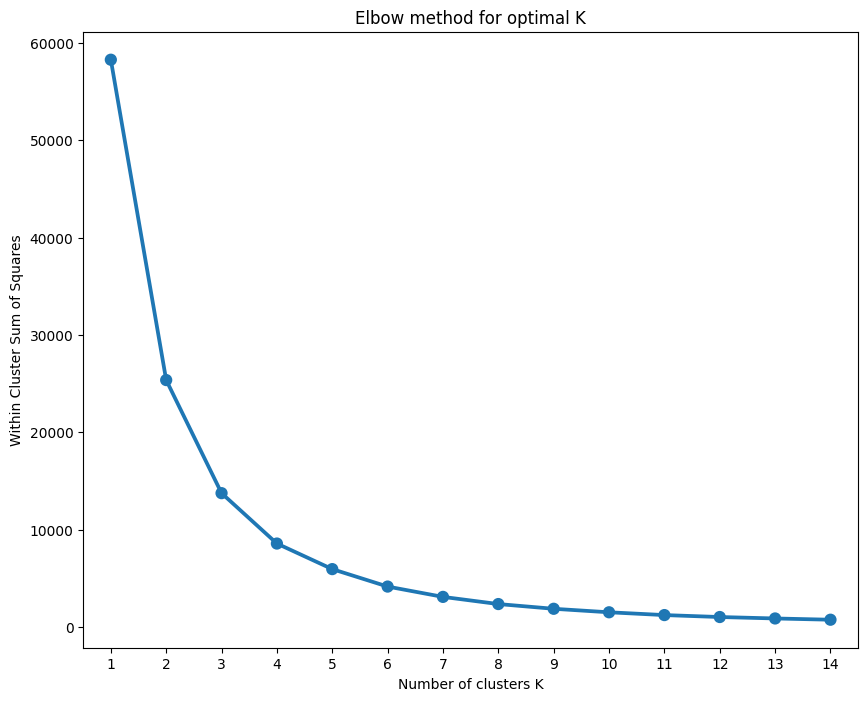

In [21]:
wcss={} #wcss stands for within cluster sum of squares

for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000 , random_state=20)
    km = km.fit(scaled_df)
    wcss[k] = km.inertia_
    
#Plot graph for the wcss values and the number of clusters
plt.figure(figsize=(10,8))
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow method for optimal K')
plt.show()

- Based on the Elbow Method, optimal K would be 3 as there is a less steep decrease in the within cluster sum of squares after 3.

In [22]:
#Build K Means clustering model using K=3
kmean_model = KMeans(n_clusters=3, init='k-means++', max_iter=1000, random_state=20)
kmean_model.fit(scaled_df)

#find the clusters for the customers
RFM_non_repeat_cust_df['Segment'] = kmean_model.labels_ + 1 #start cluster naming from 1

RFM_non_repeat_cust_df.head()

,ID,Recency,Frequency,Monetary,Segment
2,4,1100,1,300.0,1
4,6,1097,1,254.0,1
6,8,1100,1,629.0,2
8,10,1098,1,243.0,1
10,12,1100,1,373.0,1


### Visualise the Kmeans Segments & Define Customer Profile in each Segment

In [23]:
RFM_non_repeat_cust_df['Segment'].value_counts()

1    42693
2    13975
3     1591
Name: Segment, dtype: int64

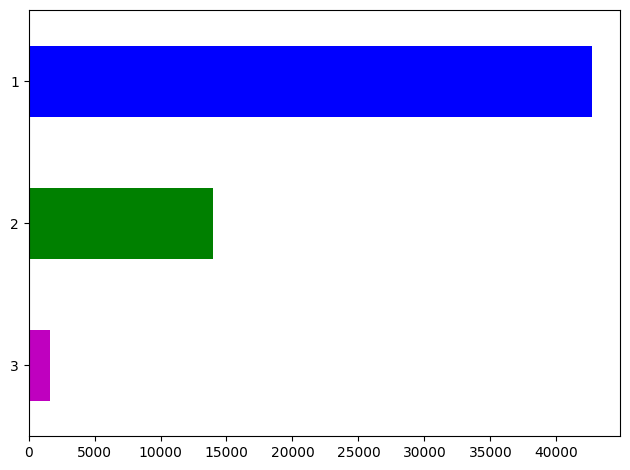

In [24]:
RFM_non_repeat_cust_df['Segment'].value_counts().sort_index(ascending=False).plot(kind='barh',color=['m','g','b','r'])
plt.tight_layout()
plt.show()

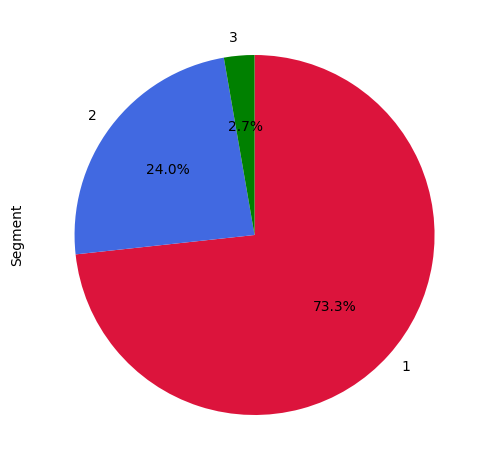

In [25]:
RFM_non_repeat_cust_df['Segment'].value_counts().sort_index().plot(kind='pie',colors=['crimson','royalblue','green','darkorchid'],autopct='%1.1f%%',counterclock=False,startangle=90)
plt.tight_layout()
plt.show()

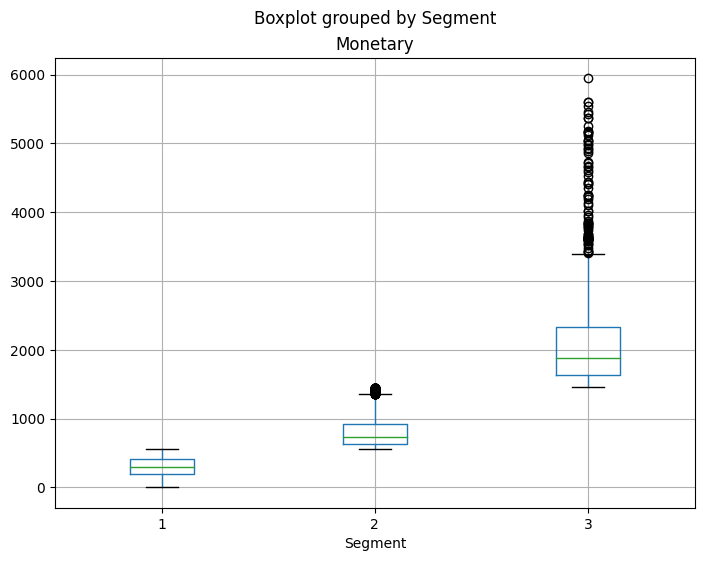

In [26]:
# Plot the boxplot of Monetary by Segment
RFM_non_repeat_cust_df.boxplot('Monetary', by='Segment', figsize=(8,6))

# Show the figure
plt.show()

In [27]:
RFM_non_repeat_cust_df['Monetary'].describe()

count    58259.000000
mean       471.347631
std        394.758647
min          1.000000
25%        240.000000
50%        378.000000
75%        571.500000
max       5947.800000
Name: Monetary, dtype: float64

In [28]:
RFM_non_repeat_cust_df.groupby('Segment')['Monetary'].agg('mean').to_frame()

,Monetary
Segment,
1,303.058478
2,800.182537
3,2098.815273


- Segment 1: Low-moderate monetary value
- Segment 2: High monetary value
- Segment 3: Very high monetary value

### Classification model for Non-Repeat Customers

In [51]:
# Merge segmented df with the original dataframe
non_repeat_cust_df = df.merge(RFM_non_repeat_cust_df[['ID', 'Segment']], on='ID', how='inner')
non_repeat_cust_df = non_repeat_cust_df.loc[:, ~non_repeat_cust_df.columns.str.contains('^Unnamed')]

# Drop features already accounted for in RFM and unrelated features
non_repeat_cust_df = non_repeat_cust_df.drop(['NameHash', 'DocIDHash', 'TotalRevenue', 'LodgingRevenue', 'OtherRevenue',
                                              'ID', 'BookingsCheckedIn', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'DaysSinceCreation'], axis=1)
non_repeat_cust_df.head()


,Nationality,Age,AverageLeadTime,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,SRHighFloor,SRLowFloor,SRAccessibleRoom,...,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,Segment
0,FRA,60.0,93,0,0,10,5,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,JPN,54.0,58,0,0,4,2,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,FRA,32.0,38,0,0,10,5,0,0,0,...,0,1,0,0,0,0,0,1,0,2
3,IRL,25.0,96,0,0,6,3,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,FRA,58.0,60,0,0,10,5,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [52]:
# Use one-hot encoding to encode 'Nationality'
X = non_repeat_cust_df.drop('Segment', axis=1)
X_encoded = pd.get_dummies(X)
y = non_repeat_cust_df['Segment']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

# Use base RandomForest Classifier model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7910  593   13]
 [1134 1669   46]
 [  87  156   44]]


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Use Random Search to improve the model performance
# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10)
}

clf = RandomForestClassifier()
random_search = RandomizedSearchCV(clf, param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Create and fit a new random forest classifier using the best hyperparameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best hyperparameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 89}
[[8110  404    2]
 [1256 1583   10]
 [  94  161   32]]


<Axes: >

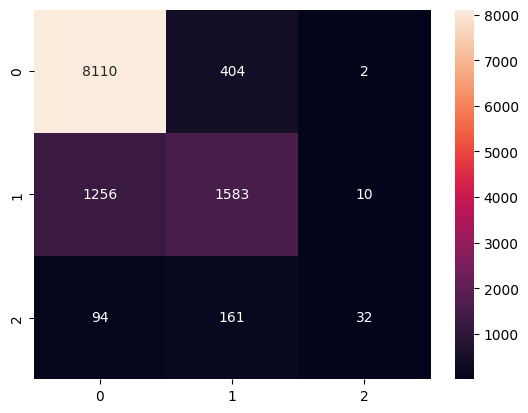

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')

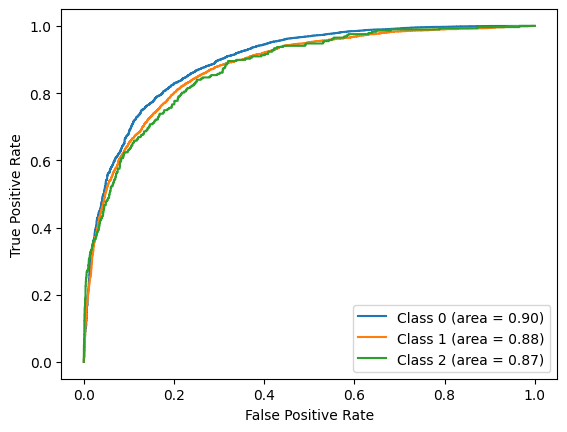

In [81]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the target variable
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

# Create a OneVsRestClassifier
clf = OneVsRestClassifier(RandomForestClassifier(**best_params))
clf.fit(X_train, y_train)

# Calculate the false positive rate and true positive rate at different thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], clf.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [84]:
# Since this is a multiclass model, we calculate the performace for each class then averaged them using 'macro' settings
# Compute the Performance Metric

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1:.2f}')

Accuracy score: 0.83
Precision: 0.77
Recall: 0.54
F1 score: 0.58


In [60]:
# Get the feature importances
importances = clf.feature_importances_

# Get the feature names
feature_names = X_encoded.columns

# Create a dataframe of feature importances and names
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the dataframe by importance in descending order
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Display the top 10 most important features
print(importance_df.head(10))

                                feature  importance
4                         PersonsNights    0.304487
5                            RoomNights    0.248349
1                       AverageLeadTime    0.137689
0                                   Age    0.104638
37  MarketSegment_Travel Agent/Operator    0.015835
36                  MarketSegment_Other    0.013096
13                        SRKingSizeBed    0.011464
14                            SRTwinBed    0.009544
18                          SRQuietRoom    0.009130
35                 MarketSegment_Groups    0.007287


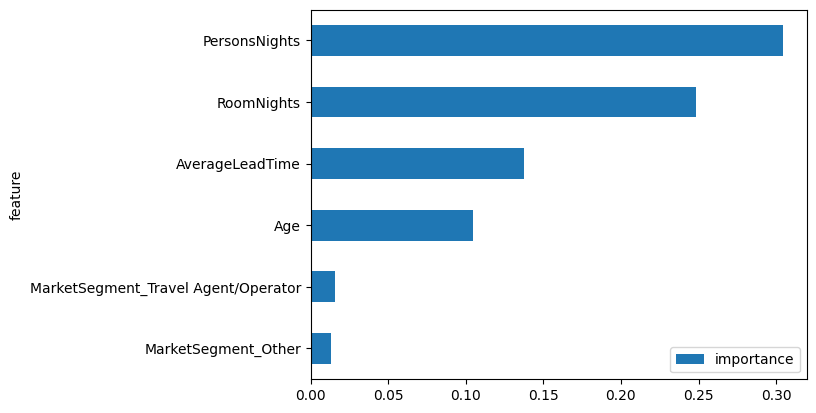

In [77]:
# Create a horizontal bar plot
importance_df[:6].sort_values(by='importance', ascending=True).plot.barh(x='feature', y='importance')

# Show the plot
plt.show()

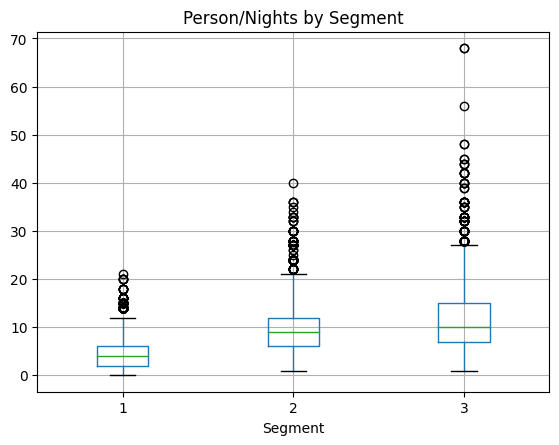

In [87]:
# Assuming your DataFrame is called 'df'
non_repeat_cust_df.boxplot(column='PersonsNights', by='Segment')
plt.title('Person/Nights by Segment')
plt.suptitle('')
plt.show()

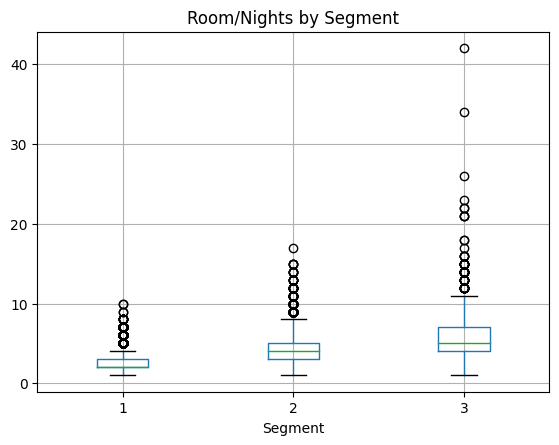

In [91]:
# Assuming your DataFrame is called 'df'
non_repeat_cust_df.boxplot(column='RoomNights', by='Segment')
plt.title('Room/Nights by Segment')
plt.suptitle('')
plt.show()

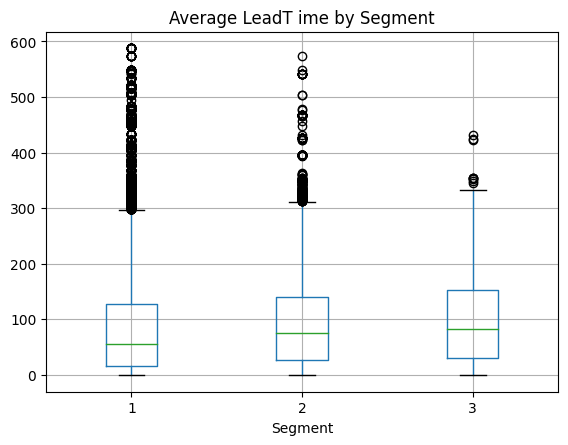

In [92]:
# Assuming your DataFrame is called 'df'
non_repeat_cust_df.boxplot(column='AverageLeadTime', by='Segment')
plt.title('Average LeadT ime by Segment')
plt.suptitle('')
plt.show()

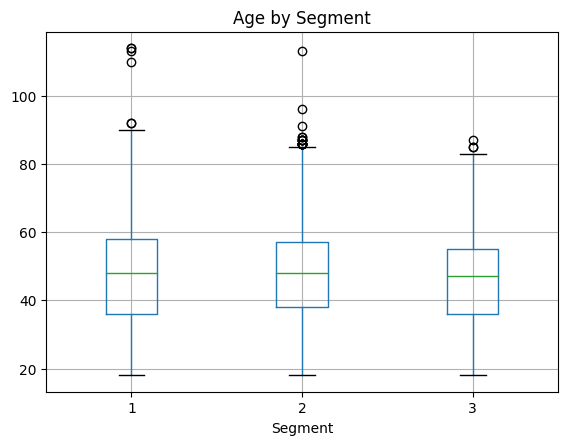

In [93]:
# Assuming your DataFrame is called 'df'
non_repeat_cust_df.boxplot(column='Age', by='Segment')
plt.title('Age by Segment')
plt.suptitle('')
plt.show()

4 most important factors in determining the customers' spending amount, accounts for :
- Average Lead Time: The average booking windows
- Persons/Nights: Number of person
- Age: Customer Age
- Room/Nights: Room occupancy


### Calculate CLV, Yearly Revenue and Database worth

In [133]:
# Add DaySinceFirstStay to see if it's a new customer
RFM_df = pd.merge(RFM_df, df[['ID', 'DaysSinceFirstStay']], on='ID', how='left')
RFM_df['Date since purchase'] = None

In [134]:
print(RFM_df.columns)

Index(['ID', 'Recency', 'Frequency', 'Monetary', 'DaysSinceFirstStay',
       'Date since purchase'],
      dtype='object')


Assumptions:
- Customers are tourists comming in regularly during holiday
- Everytime they comes to the hotel, they spend the same amount of money on average

--> We can split the customer info into multiple purchases they have take over the year


In [135]:
def expand_row(row):
    if pd.isnull(row['Frequency']):
        return pd.DataFrame()
    new_rows = []
    for i in range(int(row['Frequency'])):
        new_row = row.copy()
        new_row['Monetary'] = row['Monetary'] / row['Frequency']
        new_row['Date since purchase'] = int(np.linspace(row['DaysSinceFirstStay'], row['Recency'], int(row['Frequency']))[i])
        new_rows.append(new_row)
    return pd.DataFrame(new_rows)

# Apply the expand_row function to each row of the original data frame
result = RFM_df.apply(expand_row, axis=1)

# Concatenate the resulting data frames into a single data frame
purchase_df = pd.concat(result.tolist()).reset_index(drop=True)

In [136]:
# Drop unecessary rows, for transaction details, you only need the date and monetary value
purchase_df = purchase_df.drop(['Recency', 'Frequency', 'DaysSinceFirstStay'], axis=1)
purchase_df.head()

,ID,Monetary,Date since purchase
0,1,158.766667,1074
1,1,158.766667,612
2,1,158.766667,151
3,4,300.000000,1100
4,6,254.000000,1097


The data is from 2015 to 2018, we will use the 2018 and 2017 customers toget the transition matrix

In [137]:
# Get 2018 customers
grouped = purchase_df.groupby('ID')

# Calculate the desired statistics for each group
customers_2018 = grouped.agg(
    recency=pd.NamedAgg(column='Date since purchase', aggfunc='min'),
    first_purchase=pd.NamedAgg(column='Date since purchase', aggfunc='max'),
    frequency=pd.NamedAgg(column='Date since purchase', aggfunc='count'),
    amount=pd.NamedAgg(column='Monetary', aggfunc='mean')
).reset_index()

customers_2018.head()

,ID,recency,first_purchase,frequency,amount
0,1,151,1074,3,158.766667
1,4,1100,1100,1,300.000000
2,6,1097,1097,1,254.000000
3,8,1100,1100,1,629.000000
4,10,1098,1098,1,243.000000


Segment the customers into 8 groups 
- inactive
- warm high value
- warm low value
- active high value
- active low value
- new active

In [138]:
# Top 20% of monetary value in 2018
threshold_2018 = customers_2018['amount'].quantile(0.8)
threshold_2018

633.7

In [139]:
# 2018 Customer Segmentation
customers_2018['segment'] = 'na'
customers_2018.loc[customers_2018['recency'] > 365*2, 'segment'] = 'inactive'

customers_2018.loc[(customers_2018['recency'] <= 365*2) & (customers_2018['recency'] > 365), 'segment'] = 'warm'
customers_2018.loc[(customers_2018['segment'] == 'warm') & (customers_2018['amount'] < threshold_2018), 'segment'] = 'warm low value'
customers_2018.loc[(customers_2018['segment'] == 'warm') & (customers_2018['amount'] >= threshold_2018), 'segment'] = 'warm high value'

customers_2018.loc[customers_2018['recency'] <= 365, 'segment'] = 'active'
customers_2018.loc[(customers_2018['segment'] == 'active') & (customers_2018['first_purchase'] <= 365), 'segment'] = 'new active'
customers_2018.loc[(customers_2018['segment'] == 'active') & (customers_2018['amount'] < threshold_2018), 'segment'] = 'active low value'
customers_2018.loc[(customers_2018['segment'] == 'active') & (customers_2018['amount'] >= threshold_2018), 'segment'] = 'active high value'

segment_levels = ["inactive", "warm high value", "warm low value", 
                  "active high value", "active low value", "new active"]
customers_2018['segment'] = pd.Categorical(customers_2018['segment'], categories=segment_levels)

customers_2018.head()

,ID,recency,first_purchase,frequency,amount,segment
0,1,151,1074,3,158.766667,active low value
1,4,1100,1100,1,300.000000,inactive
2,6,1097,1097,1,254.000000,inactive
3,8,1100,1100,1,629.000000,inactive
4,10,1098,1098,1,243.000000,inactive


In [140]:
grouped = customers_2018.groupby('segment')

# Count the number of rows in each group
counts = grouped.size()
counts

segment
inactive             17509
warm high value       4389
warm low value       16783
active high value       26
active low value       186
new active           20683
dtype: int64

In [141]:
# 2017 customers
# Filter purchases with 'Date since purchase' greater than 365
filtered_data = purchase_df[purchase_df['Date since purchase'] > 365]

# Group the filtered purchases by customer_id
grouped = filtered_data.groupby('ID')

# Calculate the desired statistics for each group
customers_2017 = grouped.agg(
    recency=pd.NamedAgg(column='Date since purchase', aggfunc=lambda x: x.min() - 365),
    first_purchase=pd.NamedAgg(column='Date since purchase', aggfunc=lambda x: x.max() - 365),
    frequency=pd.NamedAgg(column='Date since purchase', aggfunc='count'),
    amount=pd.NamedAgg(column='Monetary', aggfunc='mean')
).reset_index()

customers_2017.head()

,ID,recency,first_purchase,frequency,amount
0,1,247,709,2,158.766667
1,4,735,735,1,300.000000
2,6,732,732,1,254.000000
3,8,735,735,1,629.000000
4,10,733,733,1,243.000000


In [142]:
# Top 20% of monetary value in 2017
threshold_2017 = customers_2017['amount'].quantile(0.8)
threshold_2017

611.0

In [143]:
#2017 customer segmentation
# Create a new segment column with default value "NA"
customers_2017['segment'] = "NA"

# Update the segment column based on conditions
customers_2017.loc[customers_2017['recency'] > 365*2, 'segment'] = "inactive"

customers_2017.loc[(customers_2017['recency'] <= 365*2) & (customers_2017['recency'] > 365), 'segment'] = "warm"
customers_2017.loc[(customers_2017['segment'] == "warm") & (customers_2017['amount'] < threshold_2017), 'segment'] = "warm low value"
customers_2017.loc[(customers_2017['segment'] == "warm") & (customers_2017['amount'] >= threshold_2017), 'segment'] = "warm high value"

customers_2017.loc[customers_2017['recency'] <= 365, 'segment'] = "active"
customers_2017.loc[(customers_2017['segment'] == "active") & (customers_2017['first_purchase'] <= 365), 'segment'] = "new active"
customers_2017.loc[(customers_2017['segment'] == "active") & (customers_2017['amount'] < threshold_2017), 'segment'] = "active low value"
customers_2017.loc[(customers_2017['segment'] == "active") & (customers_2017['amount'] >= threshold_2017), 'segment'] = "active high value"

# Convert the segment column to a categorical variable with specified levels
segment_levels = ["inactive", "warm high value", "warm low value", 
                  "active high value", "active low value", "new active"]
customers_2017['segment'] = pd.Categorical(customers_2017['segment'], categories=segment_levels, ordered=True)
customers_2017.head()

,ID,recency,first_purchase,frequency,amount,segment
0,1,247,709,2,158.766667,active low value
1,4,735,735,1,300.000000,inactive
2,6,732,732,1,254.000000,inactive
3,8,735,735,1,629.000000,inactive
4,10,733,733,1,243.000000,inactive


In [144]:
grouped = customers_2017.groupby('segment')

# Count the number of rows in each group
counts = grouped.size()
counts

segment
inactive               124
warm high value       3043
warm low value       14362
active high value        8
active low value       159
new active           21197
dtype: int64

In [145]:
# Average new customr per year
num_new_active = (customers_2017['segment'].value_counts().get('new active', 0) + customers_2018['segment'].value_counts().get('new active', 0))/ 2
num_new_active

20940.0

In [146]:
# Create Transition Matrix
# Merge the customers_2017 and customers_2018 data frames by their customer_id column
new_data = pd.merge(customers_2017, customers_2018, on='ID', how='left', suffixes=('.x', '.y'))

# Calculate a contingency table of the segment.x and segment.y columns
transition = pd.crosstab(new_data['segment.x'], new_data['segment.y'], dropna=False)

# Normalize each row of the transition table by its sum
transition = transition.div(transition.sum(axis=1), axis=0)
transition

segment.y,inactive,warm high value,warm low value,active high value,active low value,new active
segment.x,,,,,,
inactive,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
warm high value,0.998686,0.000000,0.000000,0.001314,0.000000,0.0
warm low value,0.998886,0.000000,0.000000,0.000000,0.001114,0.0
active high value,0.000000,0.750000,0.000000,0.250000,0.000000,0.0
active low value,0.000000,0.000000,0.578616,0.000000,0.421384,0.0
new active,0.000000,0.206775,0.787423,0.000944,0.004859,0.0


In [147]:
# Get the number of customers in each segments over 10 years
segments = pd.DataFrame(np.zeros((6, 11)))
segments.iloc[:, 0] = customers_2018['segment'].value_counts().sort_index().values
segments.columns = range(2018, 2029)
segments.index = customers_2018['segment'].cat.categories
print(segments)

                    2018  2019  2020  2021  2022  2023  2024  2025  2026  \
inactive           17509   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
warm high value     4389   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
warm low value     16783   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
active high value     26   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
active low value     186   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
new active         20683   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                   2027  2028  
inactive            0.0   0.0  
warm high value     0.0   0.0  
warm low value      0.0   0.0  
active high value   0.0   0.0  
active low value    0.0   0.0  
new active          0.0   0.0  


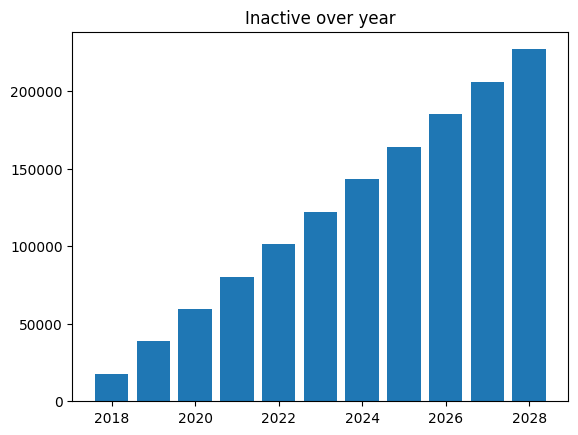

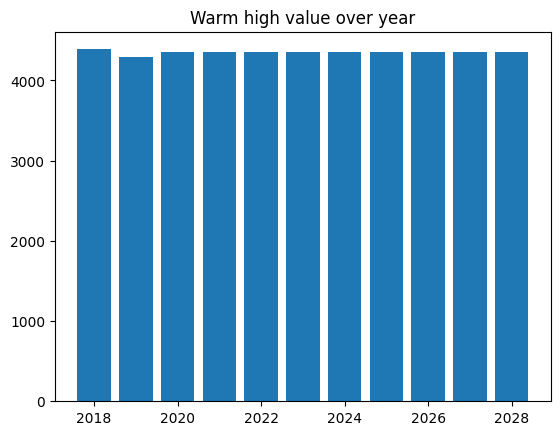

In [148]:
for i in range(1, 11):
    segments.iloc[:, i] = segments.iloc[:, i-1] @ transition
    segments.iloc[5, :] = num_new_active

plt.bar(segments.columns, segments.iloc[0, :])
plt.title('Inactive over year')
plt.show()
plt.bar(segments.columns, segments.iloc[1, :])
plt.title('Warm high value over year')
plt.show()

In [149]:
print(np.round(segments))

                    2018     2019     2020     2021      2022      2023  \
inactive           17509  38657.0  59323.0  80255.0  101192.0  122131.0   
warm high value     4389   4296.0   4354.0   4355.0    4355.0    4355.0   
warm low value     16783  16394.0  16603.0  16606.0   16608.0   16608.0   
active high value     26     32.0     33.0     34.0      34.0      34.0   
active low value     186    198.0    203.0    206.0     207.0     207.0   
new active         20940  20940.0  20940.0  20940.0   20940.0   20940.0   

                       2024      2025      2026      2027      2028  
inactive           143070.0  164010.0  184950.0  205890.0  226830.0  
warm high value      4355.0    4355.0    4355.0    4355.0    4355.0  
warm low value      16609.0   16609.0   16609.0   16609.0   16609.0  
active high value      34.0      34.0      34.0      34.0      34.0  
active low value      208.0     208.0     208.0     208.0     208.0  
new active          20940.0   20940.0   20940.0   2094

In [150]:
# Get the mean revenue of each customer purchase in 2018 based on segment
revenue_2018 = purchase_df[purchase_df['Date since purchase'] <= 365].groupby('ID').agg({'Monetary': 'sum'}).reset_index().rename(columns={'Monetary': 'revenue_2018'})

actual = pd.merge(customers_2018, revenue_2018, on='ID', how='left')
actual['revenue_2018'].fillna(0, inplace=True)
mean_revenue = actual.groupby(customers_2018['segment'])['revenue_2018'].mean().values
mean_revenue


array([   0.        ,    0.        ,    0.        , 1111.8850641 ,
        382.4179376 ,  520.34033457])

In [151]:
# Revenue per segments per year
revenue_per_segment = segments.mul(mean_revenue, axis=0).round()
revenue_per_segment


,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
inactive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
warm high value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
warm low value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
active high value,28909.0,35341.0,37082.0,37602.0,37733.0,37767.0,37775.0,37778.0,37778.0,37778.0,37778.0
active low value,71130.0,75557.0,77734.0,78741.0,79166.0,79346.0,79422.0,79455.0,79468.0,79474.0,79476.0
new active,10895927.0,10895927.0,10895927.0,10895927.0,10895927.0,10895927.0,10895927.0,10895927.0,10895927.0,10895927.0,10895927.0


In [152]:
# Compute yearly revenue
yearly_revenue = revenue_per_segment.sum().round()
yearly_revenue

2018    10995966.0
2019    11006825.0
2020    11010743.0
2021    11012270.0
2022    11012826.0
2023    11013040.0
2024    11013124.0
2025    11013160.0
2026    11013173.0
2027    11013179.0
2028    11013181.0
dtype: float64

2018     10995966.0
2019     22002791.0
2020     33013534.0
2021     44025804.0
2022     55038630.0
2023     66051670.0
2024     77064794.0
2025     88077954.0
2026     99091127.0
2027    110104306.0
2028    121117487.0
dtype: float64


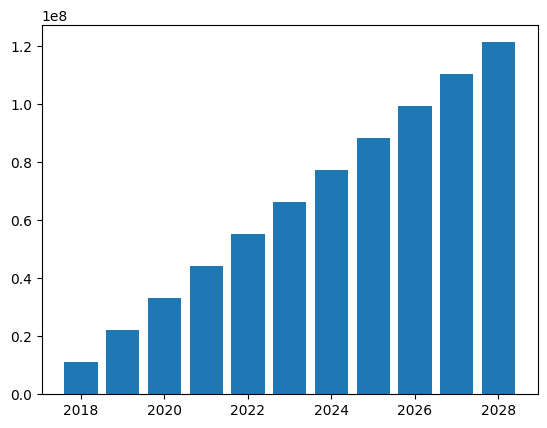

In [153]:
# Compute cumulated revenue
cumulated_revenue = yearly_revenue.cumsum()
print(cumulated_revenue.round())

plt.bar(cumulated_revenue.index, cumulated_revenue)
plt.show()

In [154]:
# Add 10% yearly discount factor
discount_rate = 0.10
discount = 1 / ((1 + discount_rate) ** (np.arange(1, 12) - 1))
discount

array([1.        , 0.90909091, 0.82644628, 0.7513148 , 0.68301346,
       0.62092132, 0.56447393, 0.51315812, 0.46650738, 0.42409762,
       0.38554329])

In [155]:
# Discounted yearly revenue
disc_yearly_revenue = (yearly_revenue * discount).round()
disc_yearly_revenue

2018    10995966.0
2019    10006205.0
2020     9099788.0
2021     8273681.0
2022     7521908.0
2023     6838231.0
2024     6216621.0
2025     5651492.0
2026     5137726.0
2027     4670663.0
2028     4246058.0
dtype: float64

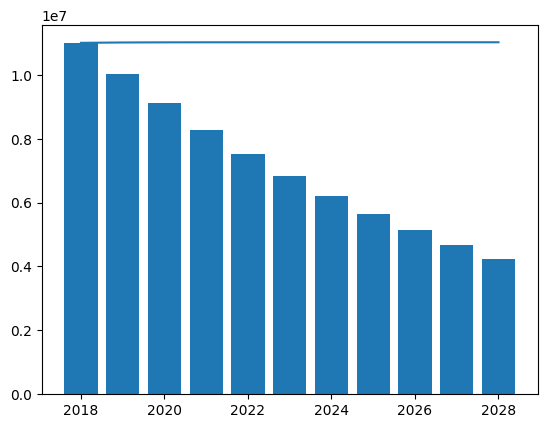

In [164]:
# Discounted Yearly Revenue vs Yearly Revenue
plt.bar(disc_yearly_revenue.index, disc_yearly_revenue)
plt.plot(yearly_revenue)
plt.show()

In [156]:
# Discounted cumulative revenue
disc_cumulated_revenue = disc_yearly_revenue.cumsum().round()
disc_cumulated_revenue

2018    10995966.0
2019    21002171.0
2020    30101959.0
2021    38375640.0
2022    45897548.0
2023    52735779.0
2024    58952400.0
2025    64603892.0
2026    69741618.0
2027    74412281.0
2028    78658339.0
dtype: float64

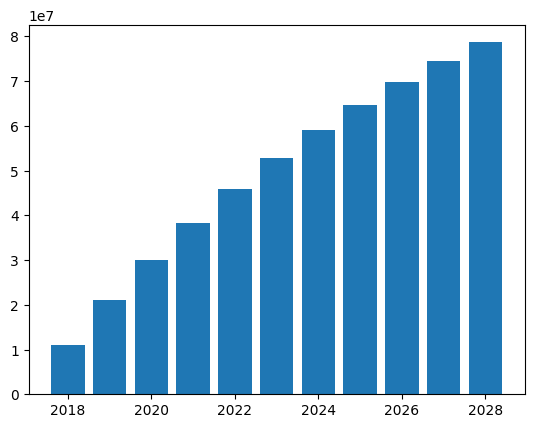

In [165]:
plt.bar(disc_cumulated_revenue.index, disc_cumulated_revenue)
plt.show()

In [157]:
# database worth = Discounted cumulative revenue after 10 years -2018 revenue
disc_cumulated_revenue.iloc[10] - yearly_revenue.iloc[0]

67662373.0